In [1]:
!python3 -m pip install git+https://github.com/tensorflow/docs \
--user --quiet --no-warn-script-location

ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

tensorflow-metadata 0.23.0 requires absl-py<0.9,>=0.7, but you'll have absl-py 0.10.0 which is incompatible.
You should consider upgrading via the '/opt/conda/bin/python3 -m pip install --upgrade pip' command.


In [2]:
from IPython.display import display,HTML
f1,f2,fs1,fs2='Wallpoet','Orbitron',25,10
c1,c2='#ff1177','#7711ff'
def dhtml(string,fontcolor=c1,font=f1,fontsize=fs1):
    display(HTML("""<style>
    @import 'https://fonts.googleapis.com/css?family="""\
    +font+"""&effect=3d-float';</style>
    <h1 class='font-effect-3d-float' 
    style='font-family:"""+font+\
    """; color:"""+fontcolor+\
    """; font-size:"""+str(fontsize)+"""px;'>
    %s</h1>"""%string))

In [3]:
dhtml('Code Modules, Setting, & Functions')

In [4]:
import warnings,urllib,imageio
import pylab as pl,tensorflow as tf
import pandas as pd,numpy as np
from mpl_toolkits.mplot3d import Axes3D
from tensorflow_docs.vis import embed
from tensorflow.keras.preprocessing import image as tkimg
from PIL import Image,ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES=True

In [5]:
dhtml('Data')

In [6]:
path='../input/image-examples-for-mixed-styles/'
fp1='beethoven.csv'
fp2='castle.csv'
b=pd.read_csv(path+fp1)
c=pd.read_csv(path+fp2)
display(b.head(3).style\
.background_gradient(cmap='Spectral',axis=0))
(c.head(3)/50).style\
.background_gradient(cmap='Spectral',axis=0)

In [7]:
n=min(b.shape[0],c.shape[0]); n
b,c=b.loc[:n-1].values,c.loc[:n-1].values
b.shape[0],c.shape[0]

(3189, 3189)

In [8]:
dhtml('Interpolation')

In [9]:
def interpolate_hypersphere(v1,v2,steps):
    v1norm=tf.norm(v1)
    v2norm=tf.norm(v2)
    v2normalized=v2*(v1norm/v2norm)
    vectors=[]
    for step in range(steps):
        interpolated=v1+(v2normalized-v1)*step/(steps-1)
        interpolated_norm=tf.norm(interpolated)
        interpolated_normalized=\
        interpolated*(v1norm/interpolated_norm)
        vectors.append(interpolated_normalized)
    return tf.stack(vectors).numpy()

In [10]:
steps=12
a=interpolate_hypersphere(b,c,steps)
a.shape

(12, 3189, 3)

In [11]:
dhtml('Plotting')

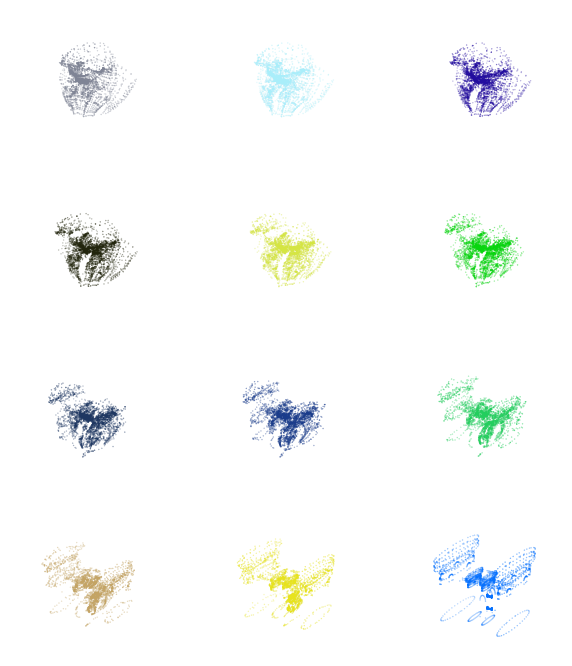

In [12]:
f=pl.figure(figsize=(10,12))
for i in range(steps):
    ax=f.add_subplot(4,steps//4,i+1,projection='3d')
    ax.scatter3D(a[i][:,0],a[i][:,1],a[i][:,2],
                 color=np.random.random(3),s=.1)
    ax.set_axis_off();

In [13]:
dhtml('Trajectory Checking')

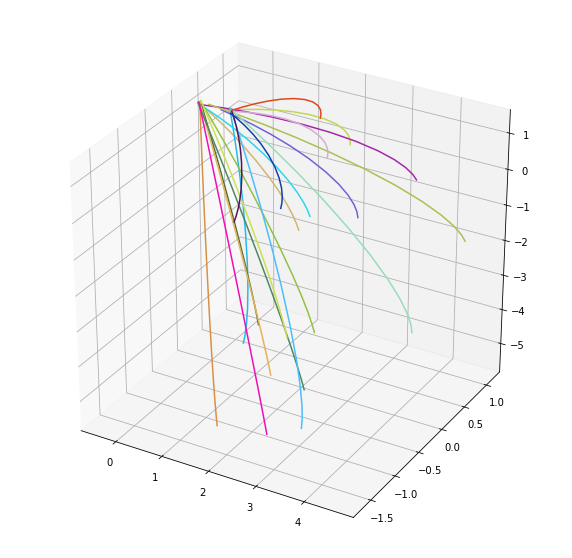

In [14]:
f=pl.figure(figsize=(10,10))
ax=f.add_subplot(111,projection='3d')
for i in range(100,300,10):
    x=np.squeeze(a[:,i:i+1,0])
    y=np.squeeze(a[:,i:i+1,1])
    z=np.squeeze(a[:,i:i+1,2])
    ax.plot(x,y,z,color=np.random.random(3));

In [15]:
dhtml('3D Sculptures')

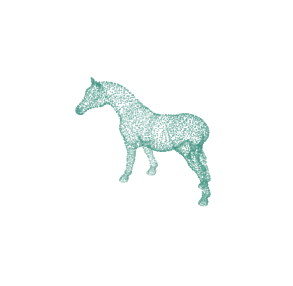

In [16]:
fp3='horse.csv'
h=pd.read_csv(path+fp3)
hv=h.values*10
display(h.head(3).style\
.background_gradient(cmap='Spectral',axis=0))
f=pl.figure(figsize=(5,5))
ax=f.add_subplot(111,projection='3d')
ax.scatter3D(hv[:,0],hv[:,1],hv[:,2],
             color=np.random.random(3),s=.1)
ax.set_xlim([-1,1]); ax.set_ylim([-1,1])
ax.set_zlim([-1,1]); ax.set_axis_off()

In [17]:
dhtml('Polyhedrons')
#{Cuboctahedron,GreatRhombicosidodecahedron,GreatRhombicuboctahedron,
#Icosidodecahedron,SmallRhombicosidodecahedron,SmallRhombicuboctahedron,
#SnubCube,SnubDodecahedron,TruncatedCube,TruncatedDodecahedron,
#TruncatedIcosahedron,TruncatedOctahedron,TruncatedTetrahedron}

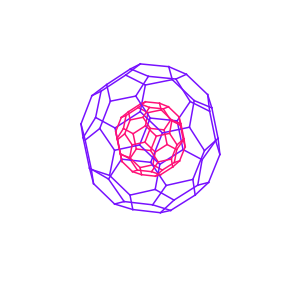

In [18]:
dfv=pd.read_csv(path+'TruncatedIcosahedron.csv')
dfe=pd.read_csv(path+'TruncatedIcosahedron2.csv')
display(dfv.head(3).style\
.background_gradient(cmap='Spectral',axis=0))
display(dfe.head(3).style\
.background_gradient(cmap='Spectral',axis=0))
f=pl.figure(figsize=(5,5))
ax=f.add_subplot(111,projection='3d')
v=dfv.values; e=dfe.values
for i in range(e.shape[0]):
    ax.plot(v[e[i]-1,0],
            v[e[i]-1,1],
            v[e[i]-1,2],
            color=c1);
    ax.plot(2*v[e[i]-1,0],
            2*v[e[i]-1,1],
            2*v[e[i]-1,2],
            color=c2)
ax.set_axis_off(); pl.show()

In [19]:
dhtml('Animation')

In [20]:
dfv2=pd.read_csv(path+'SpaceShuttle.csv')
dfe2=pd.read_csv(path+'SpaceShuttle2.csv')
dfe2['v5']=0
display(dfv2.tail(3).style\
.background_gradient(cmap='Spectral',axis=0))
display(dfe2.tail(3).style\
.background_gradient(cmap='Spectral',axis=0))
v2=dfv2.values; e2=dfe2.values
e2[:,4][e2[:,3]!=0]=e2[:,0][e2[:,3]!=0]
e2[:,3][e2[:,3]==0]=e2[:,0][e2[:,3]==0]

In [21]:
for j in range(2):
    f=pl.figure(figsize=(10,10))
    ax=f.add_subplot(111,projection='3d')
    for i in range(e2.shape[0]):
        ed=[el-1 for el in e2[i] if el!=0]
        ax.plot((j+1)*v2[ed,0],
                (j+1)*v2[ed,1],
                (j+1)*v2[ed,2],
                color=c1,lw=1)
    ax.set_xlim([-10,10]); ax.set_ylim([-5,5])
    ax.set_zlim([-10,10]); ax.set_axis_off()
    pl.savefig('vf%s'%(j+1)); pl.close()

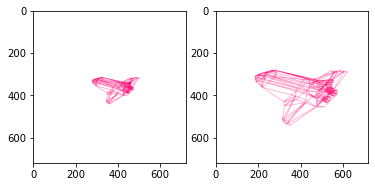

In [22]:
def show_interpolate(f1,f2,steps):
    img1=tf.image.decode_image(tf.io.read_file(f1))
    img1=img1.numpy()[:,:,:3]/255.
    pl.subplot(1,2,1); pl.imshow(img1)
    img2=tf.image.decode_image(tf.io.read_file(f2))
    img2=img2.numpy()[:,:,:3]/255.
    pl.subplot(1,2,2); pl.imshow(img2)
    pl.show()
    if1=interpolate_hypersphere(img1,img2,steps)
    if2=interpolate_hypersphere(img2,img1,steps)
    return np.vstack([if1,if2])
images=show_interpolate('vf1.png','vf2.png',30)
dhtml(str(images.shape),c2,f2,fs2)


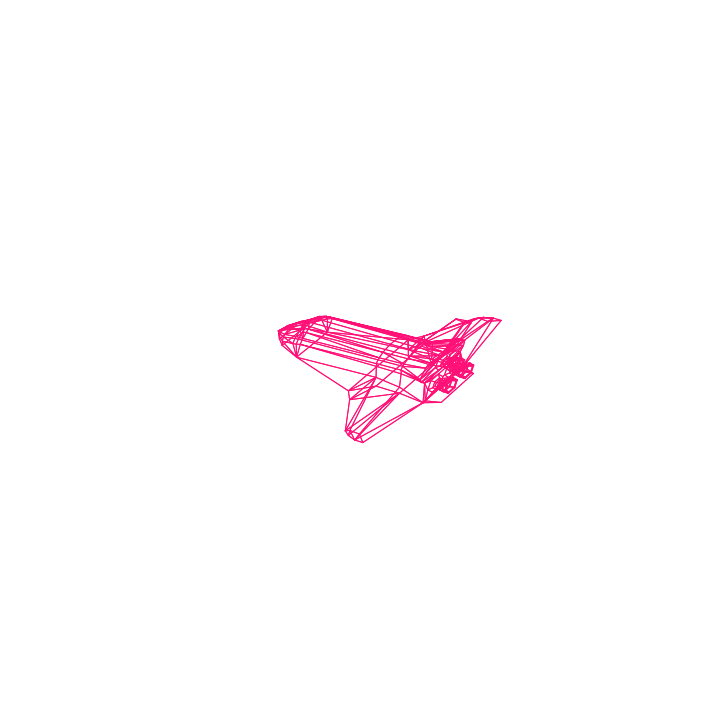

In [23]:
def animate(images):
    converted_images=np.clip(images*255,0,255)\
    .astype(np.uint8)
    imageio.mimsave('animation.gif',converted_images)
    return embed.embed_file('animation.gif')
animate(images)